# **SML 3**

**Please "Save A Copy" in your google drive and work with your own copy**

In [1]:
# Install the additional packages

!pip3 install pycaret[full]
!pip3 install pandas-profiling
!pip3 install shap
!pip install pyyaml==5.4.1



     |████████████████████████████████| 288 kB 5.5 MB/s 
     |████████████████████████████████| 113 kB 22.4 MB/s 
     |████████████████████████████████| 167 kB 34.4 MB/s 
     |████████████████████████████████| 1.7 MB 43.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 29.3 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 1.3 MB 28.5 MB/s 
     |████████████████████████████████| 2.0 MB 38.8 MB/s 
     |████████████████████████████████| 261 kB 54.7 MB/s 
     |████████████████████████████████| 16.9 MB 42 kB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 131 kB 55.8 MB/s 
     |████████████████████████████████| 40 kB 4.0 MB/s 
     |████████████████████████████████| 173.5 MB 55 kB/s 
     |█████████████████████

     |████████████████████████████████| 636 kB 5.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


Now we are ready to move forward with the ML workflow.

### Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from pathlib import Path
from pandas_profiling import ProfileReport
from pycaret.classification import *

In [6]:
data_path = Path('/content/drive/My Drive/pcml_data/5SML')

In [7]:
covid = pd.read_csv(data_path / 'covid_symptoms.csv')

In [8]:
covid

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,102,0,9,0,-1,0
1,102,0,10,0,0,1
2,104,0,33,1,-1,0
3,101,1,59,0,1,0
4,99,0,98,0,0,0
...,...,...,...,...,...,...
2570,99,0,90,0,0,1
2571,100,0,53,0,-1,1
2572,101,0,44,1,0,0
2573,102,0,97,0,-1,1


### Data Exploration

In [7]:
covid.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Model Evaluation and Selection

In [9]:
covid_model = setup(
    data=covid,
    target='infectionProb',
    # numeric_features=['fever'],
    silent=True
)

,Description,Value
0,session_id,7449
1,Target,infectionProb
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2575, 6)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
# What are the models that are available, are the GPUs enabled?
models(internal=True)[['Name', 'Turbo', 'GPU Enabled']]

,Name,Turbo,GPU Enabled
ID,,,
lr,Logistic Regression,True,False
knn,K Neighbors Classifier,True,False
nb,Naive Bayes,True,False
dt,Decision Tree Classifier,True,False
svm,SVM - Linear Kernel,True,False
rbfsvm,SVM - Radial Kernel,False,False
gpc,Gaussian Process Classifier,False,False
mlp,MLP Classifier,False,False
ridge,Ridge Classifier,True,False


In [11]:
# No preprocessing
top_models = compare_models(sort='AUC', n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5288,0.5447,0.5204,0.5189,0.5187,0.0574,0.0575,2.035
catboost,CatBoost Classifier,0.5244,0.5402,0.5102,0.5154,0.5119,0.0484,0.0486,1.013
lightgbm,Light Gradient Boosting Machine,0.5244,0.5353,0.4990,0.5164,0.5061,0.0480,0.0483,0.099
et,Extra Trees Classifier,0.5238,0.5342,0.5044,0.5146,0.5093,0.0469,0.0469,0.560
rf,Random Forest Classifier,0.5238,0.5338,0.5135,0.5143,0.5138,0.0472,0.0472,0.570
nb,Naive Bayes,0.5233,0.5278,0.5340,0.5129,0.5227,0.0471,0.0472,0.018
knn,K Neighbors Classifier,0.5011,0.5274,0.4945,0.4909,0.4917,0.0021,0.0022,0.122
lr,Logistic Regression,0.5228,0.5254,0.4615,0.5162,0.4868,0.0435,0.0440,0.370
lda,Linear Discriminant Analysis,0.5217,0.5252,0.4627,0.5150,0.4868,0.0414,0.0419,0.019
gbc,Gradient Boosting Classifier,0.5111,0.5243,0.4784,0.5029,0.4892,0.0210,0.0213,0.156


In [12]:
# Preprocessing
covid_model = setup(
    data=covid,
    target='infectionProb',
    numeric_features=['fever'],
    normalize=True,
    transformation=True,
    polynomial_features=True,
    feature_interaction=True,
    use_gpu=True,
    silent=True
)

,Description,Value
0,session_id,4588
1,Target,infectionProb
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2575, 6)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
get_config('X_train')

,fever,age,age_Power2,bodyPain_0,runnyNose_0,diffBreath_-1,diffBreath_0,diffBreath_1,age_Power2_multiply_fever,age_multiply_fever,diffBreath_-1_multiply_fever
1416,1.519625,-0.011711,-0.080293,1.0,0.0,0.0,1.0,0.0,-0.122016,-0.017796,0.000000
1204,1.519625,-0.832617,-0.953978,1.0,0.0,0.0,0.0,1.0,-1.449689,-1.265266,0.000000
2119,0.533886,0.885335,0.930596,1.0,1.0,0.0,0.0,1.0,0.496832,0.472669,0.000000
1814,0.533886,-0.968906,-1.060255,0.0,1.0,1.0,0.0,0.0,-0.566056,-0.517286,0.533886
1194,-0.974069,-1.411050,-1.296223,0.0,1.0,0.0,0.0,1.0,1.262611,1.374461,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1622,0.533886,0.057013,0.002546,0.0,1.0,1.0,0.0,0.0,0.001359,0.030438,0.533886
952,1.028154,-1.512928,-1.324992,0.0,0.0,0.0,1.0,0.0,-1.362296,-1.555524,0.000000
1248,0.533886,-0.900777,-1.008943,1.0,1.0,1.0,0.0,0.0,-0.538661,-0.480913,0.533886
616,1.028154,0.989252,1.036895,1.0,0.0,0.0,1.0,0.0,1.066088,1.017104,0.000000


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5511,0.5468,0.5475,0.5502,0.5479,0.1021,0.1025,0.621
dt,Decision Tree Classifier,0.5361,0.5364,0.5061,0.5358,0.5200,0.0718,0.0721,0.025
gbc,Gradient Boosting Classifier,0.5350,0.5475,0.5140,0.5339,0.5235,0.0697,0.0699,0.237
lightgbm,Light Gradient Boosting Machine,0.5327,0.5451,0.5307,0.5307,0.5300,0.0656,0.0657,0.087
ada,Ada Boost Classifier,0.5317,0.5516,0.5073,0.5301,0.5180,0.0631,0.0632,0.150
et,Extra Trees Classifier,0.5317,0.5331,0.5184,0.5296,0.5232,0.0631,0.0633,0.569
lr,Logistic Regression,0.5200,0.5290,0.4616,0.5162,0.4863,0.0394,0.0393,0.029
ridge,Ridge Classifier,0.5195,0.0000,0.4638,0.5167,0.4877,0.0383,0.0385,0.017
lda,Linear Discriminant Analysis,0.5195,0.5300,0.4638,0.5172,0.4878,0.0383,0.0386,0.021
nb,Naive Bayes,0.5061,0.5165,0.4211,0.5002,0.4546,0.0110,0.0106,0.017


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8717, verbose=0,
                       warm_start=False)

In [13]:
# Note that PyCaret automatically performs 10 fold CV
best_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4365,0.3787,0.3483,0.4133,0.3780,-0.1303,-0.1319
1,0.5304,0.5369,0.5506,0.5213,0.5355,0.0614,0.0615
2,0.6111,0.6325,0.5506,0.6203,0.5833,0.2212,0.2225
3,0.5167,0.5257,0.5506,0.5104,0.5297,0.0340,0.0342
4,0.5333,0.5841,0.4545,0.5263,0.4878,0.0634,0.0640
5,0.5000,0.5118,0.5568,0.4900,0.5213,0.0025,0.0025
6,0.5000,0.5017,0.4432,0.4875,0.4643,-0.0025,-0.0025
7,0.5222,0.5331,0.5114,0.5114,0.5114,0.0440,0.0440
8,0.6111,0.6143,0.6023,0.6023,0.6023,0.2218,0.2218
9,0.5333,0.5251,0.5114,0.5233,0.5172,0.0657,0.0658


### Hyperparameter Tuning

In [14]:
tuned_model = tune_model(
    best_model,
    choose_better=True,
    search_library='optuna',
    n_iter=50,
    optimize='AUC',
    early_stopping=True
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4586,0.4062,0.3371,0.4348,0.3797,-0.0872,-0.0894
1,0.5193,0.5024,0.4831,0.5119,0.4971,0.0375,0.0376
2,0.5167,0.5680,0.4607,0.5125,0.4852,0.0321,0.0323
3,0.4556,0.4896,0.4270,0.4471,0.4368,-0.0896,-0.0897
4,0.5944,0.6206,0.4318,0.6230,0.5101,0.1830,0.1920
5,0.5667,0.5127,0.5341,0.5595,0.5465,0.1320,0.1322
6,0.5167,0.5020,0.4659,0.5062,0.4852,0.0312,0.0313
7,0.5111,0.4899,0.4091,0.5000,0.4500,0.0179,0.0181
8,0.5556,0.5669,0.4545,0.5556,0.5000,0.1071,0.1089
9,0.5278,0.4739,0.5000,0.5176,0.5087,0.0544,0.0544


### Test the tuned model on the last set of unseen data

In [15]:
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.5395,0.5546,0.5271,0.5411,0.534,0.0789,0.079


,fever,age,age_Power2,bodyPain_0,runnyNose_0,diffBreath_-1,diffBreath_0,diffBreath_1,age_multiply_fever,diffBreath_-1_multiply_age_Power2,infectionProb,Label,Score
0,0.537335,-1.746400,-1.364536,1.0,1.0,0.0,0.0,1.0,-0.938402,-0.000000,1,0,0.5050
1,-1.482098,-1.080341,-1.135829,1.0,0.0,0.0,1.0,0.0,1.601171,-0.000000,0,1,0.7208
2,0.537335,-1.325529,-1.267017,1.0,0.0,0.0,1.0,0.0,-0.712253,-0.000000,1,1,0.6100
3,0.043738,1.489436,1.524973,1.0,1.0,1.0,0.0,0.0,0.065144,1.524973,0,1,0.6225
4,-0.458455,0.591376,0.621674,0.0,1.0,0.0,1.0,0.0,-0.271119,0.000000,0,0,0.9108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,0.537335,-0.102691,-0.187952,1.0,0.0,0.0,0.0,1.0,-0.055179,-0.000000,0,0,0.8200
769,0.537335,-1.430685,-1.306856,1.0,0.0,1.0,0.0,0.0,-0.768757,-1.306856,1,1,0.7342
770,-1.482098,1.317011,1.361252,1.0,1.0,0.0,1.0,0.0,-1.951940,0.000000,0,1,0.6392
771,-1.482098,0.036433,-0.020701,0.0,0.0,0.0,0.0,1.0,-0.053997,-0.000000,1,0,0.6380


### Retrain the model on all data

So that our model uses all existing known data for future predictions.
Else, our model is only trained on a subset of all known data.

Note that this is after we have done all the evaluation. Testing on the final model will not give the correct metrics (since there is no unseen data)


In [16]:
final_model = finalize_model(tuned_model)

### Save the model

In [17]:
save_model(final_model, data_path / 'covid_prediction_rf_tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['fever'],
                                       target='infectionProb',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=Non...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         

### Deployment Workflow

After passing the model file to the software engineer, he may ask you how do I use it?

First, he has to install pycaret the way you did. Next, load the data.

In [18]:
latest_model = load_model(data_path / 'covid_prediction_rf_tuned')

Transformation Pipeline and Model Successfully Loaded


Then, he has to format users' input into the format that your original dataset uses. 

Recap: Data format for webservice is almost always json. Json looks exactly like a Python dictionary.

In [19]:
# Converting json format to python dictionary is easy using the json library.
# Your software engineer should know this.
user_input = [{
    'fever': 104,
    'bodyPain': 1,
    'age': 56,
    'runnyNose': 0,
    'diffBreath': 1
}]

# Convert the dictionary into a pandas observation
user_request = pd.DataFrame(user_input)

Pass the data into the model to get the prediction

In [20]:
predict_model(latest_model, user_request)

# The predicted probability is in the last column

,fever,bodyPain,age,runnyNose,diffBreath,Label,Score
0,104,1,56,0,1,1,0.84


### Explaining our model
The above development-deployment workflow is done. Now we need to explain our model to the higher-ups, the public, and non-data trained people.

Here, I will cover a number of useful visualizations both for technical (statistical) audience and also business audiences.

In [22]:
%matplotlib inline

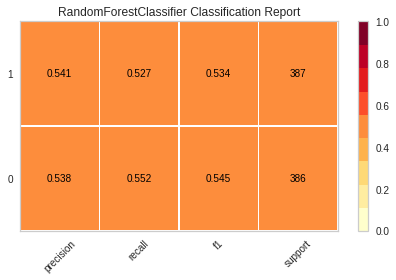

In [23]:
plot_model(best_model, plot='class_report')

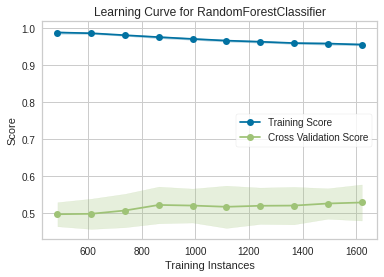

In [24]:
# differences between learning and validation curve
# https://datascience.stackexchange.com/questions/62303/difference-between-learning-curve-and-validation-curve
plot_model(best_model, plot='learning')

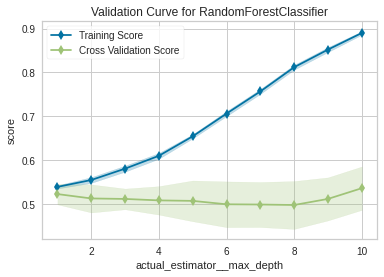

In [25]:
plot_model(best_model, plot='vc')

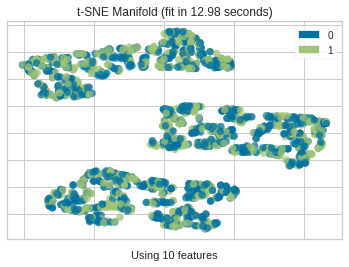

In [26]:
# manifold learning	
# whether features are clustered together for 0 and 1
plot_model(best_model, plot='manifold')

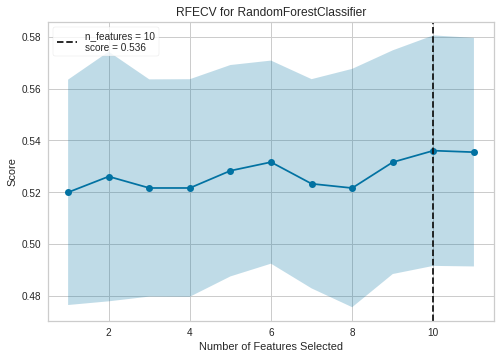

In [ ]:
# recursive feature selection
plot_model(best_model, plot='rfe')

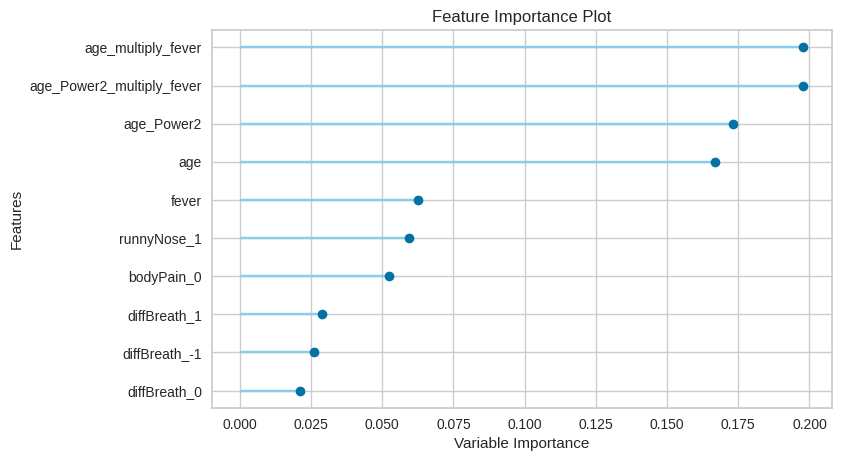

In [ ]:
# Plot feature importance
plot_model(best_model, plot='feature')

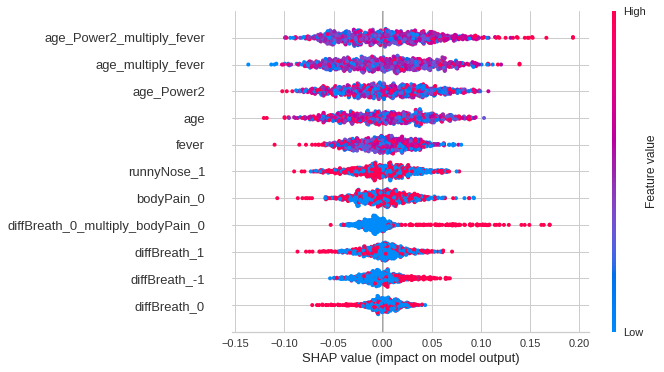

In [ ]:
# Plot a SHAP interpretation of the model
interpret_model(best_model)

The following plot comes from SHAP as well.

It tells us a number of things given an observation. We typically use it on specific observations that may be outliers or well-fitted:

The plot presents the analysis at each observation level.
model output value (0.22) is the prediction for that observation.
base value (0.5047) is the value predicted if we don't use any features.
red bar represents the features that increases the predicted value, while blue bar represents those that will decrease the predicted value.

In [ ]:
interpret_model(best_model, plot='reason', observation=100)

In [ ]:
# We can combine all of the above visualizations (sometimes don't work well...)
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…